In [ ]:
!wget https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v2.0.tar.gz

--2021-12-02 09:52:04--  https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v2.0.tar.gz
Resolving crisisnlp.qcri.org (crisisnlp.qcri.org)... 80.76.166.234
Connecting to crisisnlp.qcri.org (crisisnlp.qcri.org)|80.76.166.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1902053684 (1.8G) [application/x-gzip]
Saving to: ‘CrisisMMD_v2.0.tar.gz’

CrisisMMD_v2.0.tar. 100%[===================>]   1.77G  13.7MB/s    in 2m 15s  

2021-12-02 09:54:21 (13.5 MB/s) - ‘CrisisMMD_v2.0.tar.gz’ saved [1902053684/1902053684]



In [ ]:
!tar -xf *.tar.gz
!rm *.tar.gz

In [ ]:
!ls ./CrisisMMD_v2.0/annotations

california_wildfires_final_data.tsv  iraq_iran_earthquake_final_data.tsv
hurricane_harvey_final_data.tsv      mexico_earthquake_final_data.tsv
hurricane_irma_final_data.tsv	     srilanka_floods_final_data.tsv
hurricane_maria_final_data.tsv


In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Concatenate, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform, glorot_normal
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.utils import class_weight
import random

In [ ]:
a = pd.read_table('humanitarian_SMALL_5classes.tsv')
a.head()

,event_name,tweet_id,image_id,tweet_text,image,label_text,label_image,split
0,california_wildfires,917793137925459968,917793137925459968_0,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,TRAIN
1,california_wildfires,917793137925459968,917793137925459968_1,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,TRAIN
2,california_wildfires,917793137925459968,917793137925459968_2,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,TRAIN
3,california_wildfires,917815040962695168,917815040962695168_2,RT @TheAtlantic: Photos of California's destru...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,TRAIN
4,california_wildfires,917828283047260161,917828283047260161_0,Why California's #wildfires are worse in the f...,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,TRAIN


In [ ]:
imgloclist = list('CrisisMMD_v2.0/' + a['image'])

In [ ]:
imgloclist_test = list('CrisisMMD_v2.0/' + a.loc[a['split']=='TEST']['image'])
imgloclist_dev = list('CrisisMMD_v2.0/' + a.loc[a['split']=='DEV']['image'])
imgloclist_train = list('CrisisMMD_v2.0/' + a.loc[a['split']=='TRAIN']['image'])

In [ ]:
imgloclist[0]

'CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917793137925459968_0.jpg'

In [ ]:
imglist = []
for imgloc in imgloclist:
    i = cv2.imread(imgloc)
    try:
           img = cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
           imglist.append(img)
    except:
      break
    #imglist.append(cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC))
len(imglist)

8079

In [ ]:
imglist_test = []
for imgloc in imgloclist_test:
    i = cv2.imread(imgloc)
    try:
           img = cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
           imglist_test.append(img)
    except:
      break
    #imglist.append(cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC))
len(imglist_test)


955

In [ ]:
imglist_train = []
for imgloc in imgloclist_train:
    i = cv2.imread(imgloc)
    try:
           img = cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
           imglist_train.append(img)
    except:
      break
    #imglist.append(cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC))
len(imglist_train)

6126

In [ ]:
imglist_dev = []
for imgloc in imgloclist_dev:
    i = cv2.imread(imgloc)
    try:
           img = cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
           imglist_dev.append(img)
    except:
      break
    #imglist.append(cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC))
len(imglist_dev)

998

In [ ]:
len(imglist)

8079

In [ ]:
set(list(a['split']))

{'DEV', 'TEST', 'TRAIN'}

In [ ]:
#['infrastructure_and_utility_damage', 'other_relevant_information', 'not_humanitarian', 'rescue_volunteering_or_donation_effort', 'affected_individuals']

In [ ]:
X_train = []
Y_train = []
i = 0
for label in list(a.loc[a['split']=='TRAIN']['label_image']):
    if label == 'infrastructure_and_utility_damage':
        Y_train.append(0)
        X_train.append(imglist_train[i])
    elif label == 'other_relevant_information':
        Y_train.append(1)
        X_train.append(imglist_train[i])
    elif label == 'not_humanitarian':
        Y_train.append(2)
        X_train.append(imglist_train[i])
    elif label == 'rescue_volunteering_or_donation_effort':
        Y_train.append(3)
        X_train.append(imglist_train[i])
    elif label == 'affected_individuals':
        Y_train.append(4)
        X_train.append(imglist_train[i])
    i+=1
Y_train = np.array(Y_train)

In [ ]:
X_test = []
Y_test = []
i = 0
for label in list(a.loc[a['split']=='TEST']['label_image']):
    if label == 'infrastructure_and_utility_damage':
        Y_test.append(0)
        X_test.append(imglist_test[i])
    elif label == 'other_relevant_information':
        Y_test.append(1)
        X_test.append(imglist_test[i])
    elif label == 'not_humanitarian':
        Y_test.append(2)
        X_test.append(imglist_test[i])
    elif label == 'rescue_volunteering_or_donation_effort':
        Y_test.append(3)
        X_test.append(imglist_test[i])
    elif label == 'affected_individuals':
        Y_test.append(4)
        X_test.append(imglist_test[i])
    i+=1
Y_test = np.array(Y_test)

In [ ]:
X_dev = []
Y_dev = []
i = 0
for label in list(a.loc[a['split']=='DEV']['label_image']):
    if label == 'infrastructure_and_utility_damage':
        Y_dev.append(0)
        X_dev.append(imglist_dev[i])
    elif label == 'other_relevant_information':
        Y_dev.append(1)
        X_dev.append(imglist_dev[i])
    elif label == 'not_humanitarian':
        Y_dev.append(2)
        X_dev.append(imglist_dev[i])
    elif label == 'rescue_volunteering_or_donation_effort':
        Y_dev.append(3)
        X_dev.append(imglist_dev[i])
    elif label == 'affected_individuals':
        Y_dev.append(4)
        X_dev.append(imglist_dev[i])
    i+=1
Y_dev = np.array(Y_dev)

In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_dev = np.array(X_dev)
Y_dev = np.array(Y_dev)

In [ ]:
len(Y_train)

6126

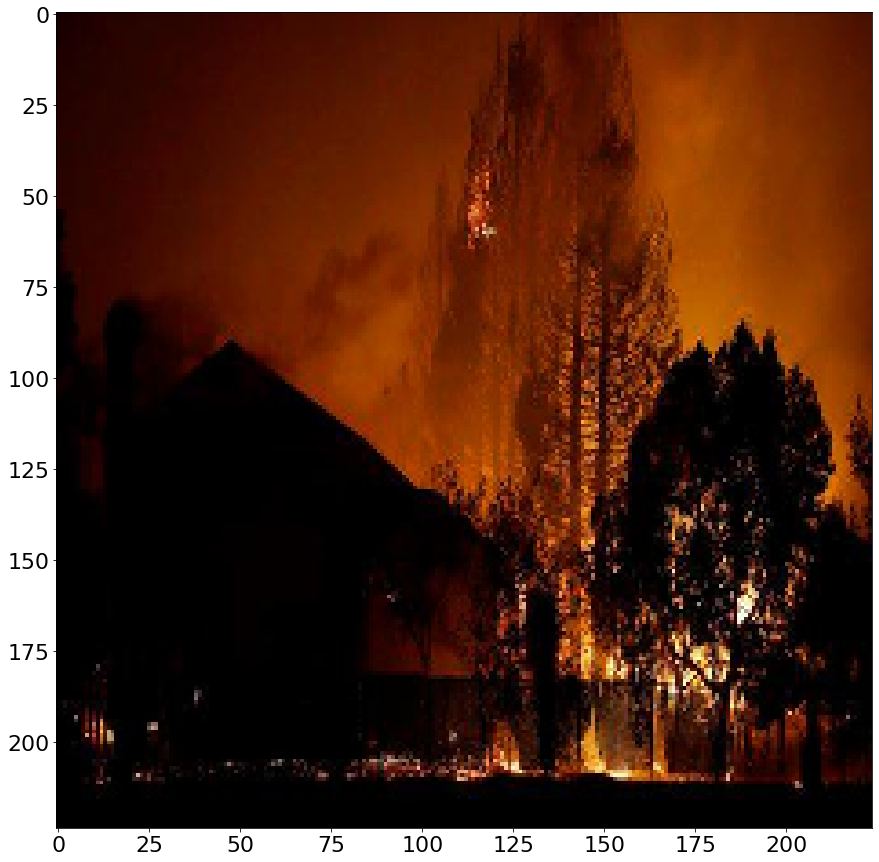

In [ ]:
plt.imshow(cv2.cvtColor(X_train[2], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
X_dev.shape

(998, 224, 224, 3)

In [ ]:
res = ResNet50(weights = None, classes = 5)

In [ ]:
res.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
history = res.fit(X_train, Y_train, epochs = 30, validation_data = (X_dev, Y_dev))

Epoch 1/30
192/192 [==============================] - 41s 178ms/step - loss: 1.3977 - accuracy: 0.5384 - val_loss: 1.4195 - val_accuracy: 0.4689
Epoch 2/30
192/192 [==============================] - 33s 172ms/step - loss: 1.1107 - accuracy: 0.5738 - val_loss: 1.5914 - val_accuracy: 0.5170
Epoch 3/30
192/192 [==============================] - 33s 172ms/step - loss: 1.0825 - accuracy: 0.5788 - val_loss: 1.2787 - val_accuracy: 0.4479
Epoch 4/30
192/192 [==============================] - 33s 172ms/step - loss: 1.0359 - accuracy: 0.5921 - val_loss: 2.1865 - val_accuracy: 0.2505
Epoch 5/30
192/192 [==============================] - 33s 172ms/step - loss: 1.0013 - accuracy: 0.5950 - val_loss: 1.6046 - val_accuracy: 0.4078
Epoch 6/30
192/192 [==============================] - 33s 172ms/step - loss: 0.9874 - accuracy: 0.6081 - val_loss: 46.1856 - val_accuracy: 0.3667
Epoch 7/30
192/192 [==============================] - 33s 172ms/step - loss: 1.0501 - accuracy: 0.5891 - val_loss: 1.2353 - val_a

In [ ]:
res.evaluate(X_test, Y_test)

30/30 [==============================] - 2s 54ms/step - loss: 0.9287 - accuracy: 0.6555


[0.9287160038948059, 0.6554973721504211]

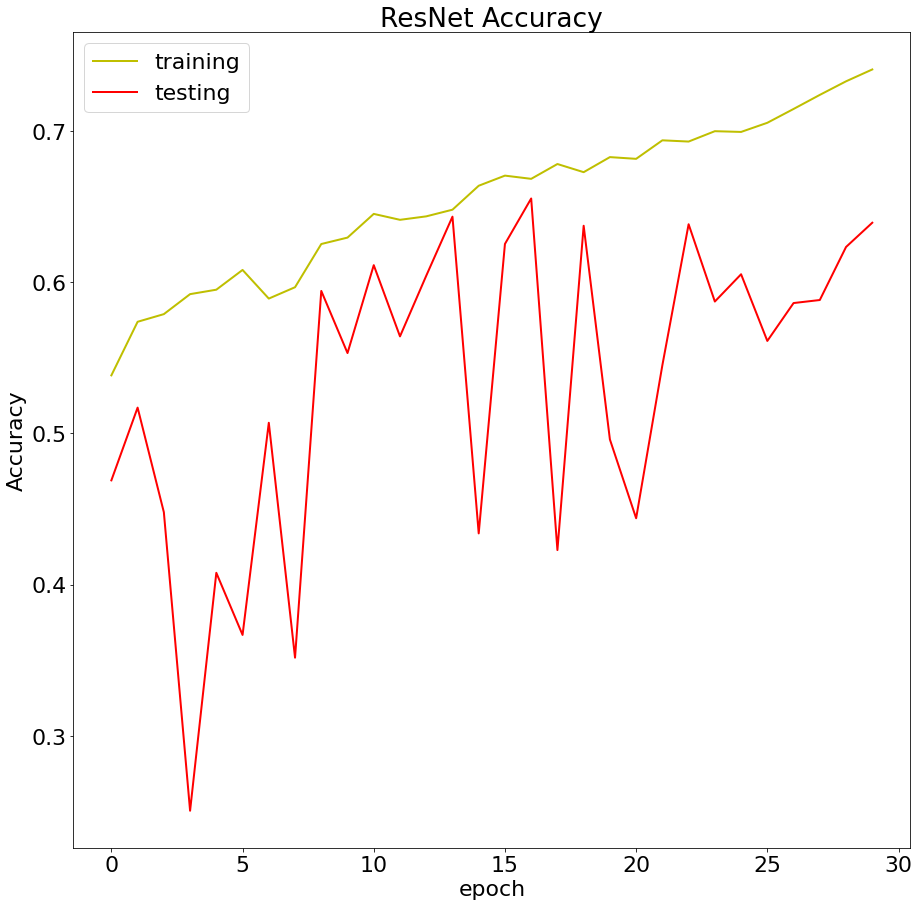

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(history.history['accuracy'], c='y',linewidth=2.0)
plt.plot(history.history['val_accuracy'], c='r',linewidth=2.0)
plt.title('ResNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

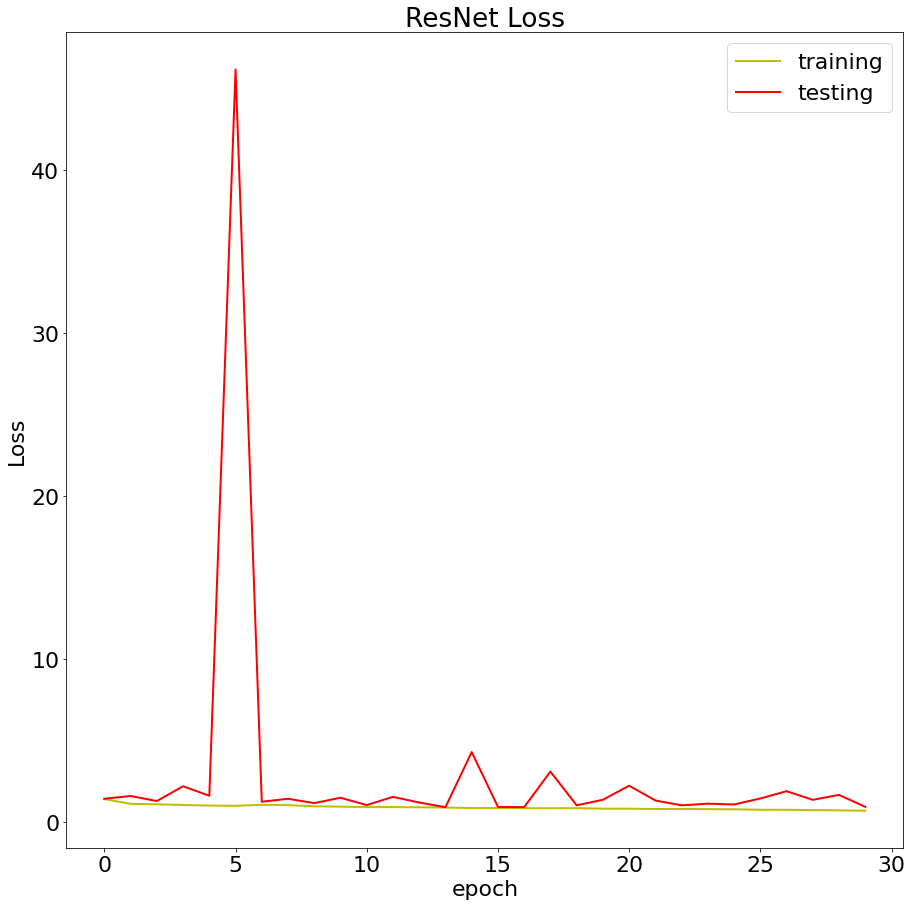

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(history.history['loss'], c='y',linewidth=2.0)
plt.plot(history.history['val_loss'], c='r',linewidth=2.0)
plt.title('ResNet Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

In [ ]:
import pickle
with open('ResNet.pk1', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# res.save('resnet_trained.tf')

In [ ]:
b = pd.read_table('humanitarian_SMALL_5classes_TEXTPRED.tsv')
b.head()

,event_name,tweet_id,image_id,tweet_text,image,label_text,label_image,split,pred_label_text,pred_proba_text,codeorder_label_text
0,hurricane_harvey,905952332923338752,905952332923338752_0,<MENTION> has a great event tomorrow for both...,data_image/hurricane_harvey/8_9_2017/905952332...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,TEST,rescue_volunteering_or_donation_effort,[0.01001685 0.04121619 0.36350593 0.5653406 0...,"['infrastructure_and_utility_damage', 'other_r..."
1,mexico_earthquake,912022130396672000,912022130396672000_0,now <MENTION> also carlo surf band at 8pm <HAS...,data_image/mexico_earthquake/24_9_2017/9120221...,not_humanitarian,not_humanitarian,TEST,not_humanitarian,[0.00768627 0.05296155 0.9199777 0.01240561 0...,"['infrastructure_and_utility_damage', 'other_r..."
2,hurricane_maria,927758858776465408,927758858776465408_0,guaynabo resident efrain diaz stands by a brid...,data_image/hurricane_maria/7_11_2017/927758858...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,TEST,infrastructure_and_utility_damage,[0.59517187 0.1377205 0.14931679 0.05463548 0...,"['infrastructure_and_utility_damage', 'other_r..."
3,hurricane_harvey,907654309587779584,907654309587779584_0,after harvey irma leaves its own trail of dest...,data_image/hurricane_harvey/12_9_2017/90765430...,other_relevant_information,other_relevant_information,TEST,infrastructure_and_utility_damage,[0.60781467 0.18188037 0.10388581 0.04577447 0...,"['infrastructure_and_utility_damage', 'other_r..."
4,hurricane_maria,913745586104528898,913745586104528898_0,dawn just won 400 and were gonna match the amo...,data_image/hurricane_maria/29_9_2017/913745586...,not_humanitarian,not_humanitarian,TEST,not_humanitarian,[0.00788021 0.05330051 0.8445104 0.08145303 0...,"['infrastructure_and_utility_damage', 'other_r..."


In [ ]:
imgloclist_test = list('CrisisMMD_v2.0/' + b['image'])

In [ ]:
imglist = []
for imgloc in imgloclist_test:
    i = cv2.imread(imgloc)
    try:
           img = cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
           imglist.append(img)
    except:
      break
    #imglist.append(cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC))
len(imglist)


955

In [ ]:
X_test = []
Y_test = []
i = 0
for label in list(b['label_image']):
    if label == 'infrastructure_and_utility_damage':
        Y_test.append(0)
        X_test.append(imglist_test[i])
    elif label == 'other_relevant_information':
        Y_test.append(1)
        X_test.append(imglist_test[i])
    elif label == 'not_humanitarian':
        Y_test.append(2)
        X_test.append(imglist_test[i])
    elif label == 'rescue_volunteering_or_donation_effort':
        Y_test.append(3)
        X_test.append(imglist_test[i])
    elif label == 'affected_individuals':
        Y_test.append(4)
        X_test.append(imglist_test[i])
    i+=1
Y_test = np.array(Y_test)
X_test = np.array(X_test)

In [ ]:
imglist = np.array(imglist)
print(imglist.shape)
pred = res.predict(imglist)

(955, 224, 224, 3)


In [ ]:
pre = []
for p in pred:
  q = list(p)
  pre.append(q.index(max(q)))

tf.math.confusion_matrix(
    Y_test, pre)


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 11,   4,  51,  15,   0],
       [  2, 155,  77,   1,   0],
       [  3,  45, 428,  28,   0],
       [  2,   8,  84,  32,   0],
       [  0,   1,   5,   3,   0]], dtype=int32)>

In [ ]:
<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 11,   4,  51,  15,   0],
       [  2, 155,  77,   1,   0],
       [  3,  45, 428,  28,   0],
       [  2,   8,  84,  32,   0],
       [  0,   1,   5,   3,   0]], dtype=int32)>

AttributeError: ignored

In [ ]:
ref = ['infrastructure_and_utility_damage', 'other_relevant_information', 'not_humanitarian', 'rescue_volunteering_or_donation_effort', 'affected_individuals']
cnt = 0
for p in pred:
  b.loc[cnt, 'pred_proba_img'] = str(p.tolist())
  print(p)
  q = list(p)
  b.loc[cnt, 'pred_label_img'] = ref[q.index(max(q))]
  cnt += 1

[0.01699893 0.32296365 0.51462823 0.1329946  0.01241457]
[0.0008173  0.6597934  0.21079934 0.10182623 0.02676373]
[0.21951517 0.04029772 0.29999128 0.43664914 0.00354667]
[0.01850351 0.57167226 0.37498945 0.03124176 0.00359303]
[6.0321070e-04 4.6200073e-01 5.0210577e-01 3.4918670e-02 3.7166706e-04]
[2.2509547e-04 9.8048800e-01 1.8752953e-02 4.9312419e-04 4.0830429e-05]
[1.6660187e-09 9.9999857e-01 1.1770641e-06 2.2649860e-07 8.2220284e-09]
[0.01237901 0.03731266 0.42228624 0.52280104 0.00522103]
[4.6449539e-04 3.0970916e-01 6.4704573e-01 3.4750525e-02 8.0302050e-03]
[0.02412766 0.00868784 0.64644945 0.2852886  0.03544647]
[1.0182102e-03 8.0141544e-01 1.8772866e-01 9.7774286e-03 6.0233338e-05]
[0.05981811 0.01803362 0.7335885  0.17616573 0.01239404]
[1.8904351e-03 2.0909816e-02 9.5000964e-01 2.6591355e-02 5.9877423e-04]
[1.0191773e-03 2.0109421e-01 7.5168669e-01 4.5685265e-02 5.1458774e-04]
[1.1756135e-03 4.0069215e-02 9.3058401e-01 2.7844651e-02 3.2655464e-04]
[0.00696766 0.0019196  0.

In [ ]:
b.loc[0,'pred_proba_img']

'[0.016998926177620888, 0.3229636549949646, 0.5146282315254211, 0.13299460709095, 0.012414569035172462]'

In [ ]:
cnt = 0
for prob in b['pred_proba_text']:
  x = prob[1:-1].split(' ')
  while '' in x:
    x.remove('')
  xx = np.array(x)
  print(xx)
  xxx = xx.astype(np.float)
  b.loc[cnt,'pred_proba_text'] = str(xxx)
  cnt += 1

In [ ]:
b.loc[0,'pred_proba_text']

"['0.01001685', '0.04121619', '0.36350593', '0.5653406', '0.01992042']"

In [ ]:
b.to_csv('humanitarian_SMALL_5classes_TEXT+IMGPRED.tsv', sep='\t', index=False)

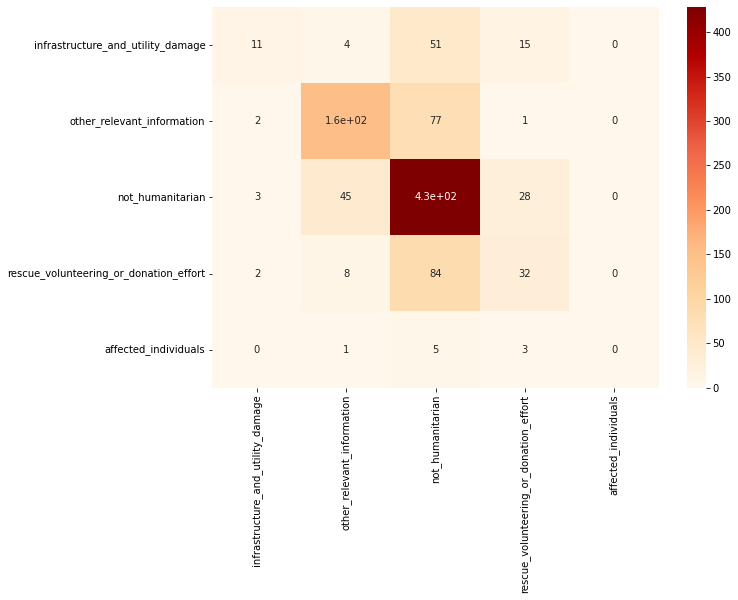

In [ ]:
ref = ['infrastructure_and_utility_damage', 'other_relevant_information', 'not_humanitarian', 'rescue_volunteering_or_donation_effort', 'affected_individuals']
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[ 11,   4,  51,  15,   0],
       [  2, 155,  77,   1,   0],
       [  3,  45, 428,  28,   0],
       [  2,   8,  84,  32,   0],
       [  0,   1,   5,   3,   0]]
df_cm = pd.DataFrame(array, index = [i for i in ref],
              columns = [i for i in ref])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")